# Assignment - 04

In [57]:
# import the libraries
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [55]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()  # Loading the Data set

# Displaying No of test and training samples
print('x_train: ', x_train.shape)  
print('x_test: ', x_test.shape)

K = len(np.unique(y_train)) # 10 Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din)).astype('float32')
x_test = np.reshape(x_test,(Nte,Din)).astype('float32')

x_train:  (50000, 32, 32, 3)
x_test:  (10000, 32, 32, 3)


# Question 1
 (a) Implement gradient descent and run for 300 epochs.

In [58]:
std=1e-5
w1 = std*np.random.randn(Din, K) # Initializing the weight matrix with random values
b1 = np.zeros(K) # Initializing bias as zeros
print("w1:", w1.shape)
print("b1:", b1.shape)

batch_size = Ntr
iterations = 300   # Run for 300 epochs
lr = 1.4e-2       # Learning Rate
lr_decay = 0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(1,iterations+1):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x=x_train[indices]
    y=y_train[indices]

    # Forward pass
    y_pred=x.dot(w1)+b1
    loss=1/batch_size*np.square(y_pred-y).sum()+reg*np.sum(w1*w1)
    loss_history.append(loss)

    if t%20==0:
        print('iteration %d/%d : loss %f'%(t,iterations,loss))


    # Backward pass
    dy_pred=1./batch_size*2.0*(y_pred-y)
    db1=dy_pred.sum()
    dw1=x.T.dot(dy_pred)+reg*w1
    w1-=lr*dw1
    b1-=lr*db1
    lr*=lr_decay

w1: (3072, 10)
b1: (10,)
iteration 20/300 : loss 0.810758
iteration 40/300 : loss 0.801897
iteration 60/300 : loss 0.797421
iteration 80/300 : loss 0.794461
iteration 100/300 : loss 0.792253
iteration 120/300 : loss 0.790506
iteration 140/300 : loss 0.789078
iteration 160/300 : loss 0.787883
iteration 180/300 : loss 0.786867
iteration 200/300 : loss 0.785990
iteration 220/300 : loss 0.785222
iteration 240/300 : loss 0.784544
iteration 260/300 : loss 0.783939
iteration 280/300 : loss 0.783395
iteration 300/300 : loss 0.782901


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


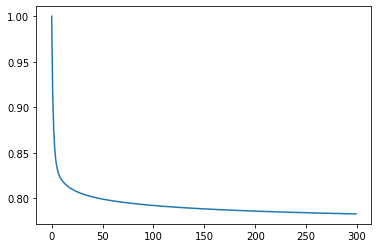

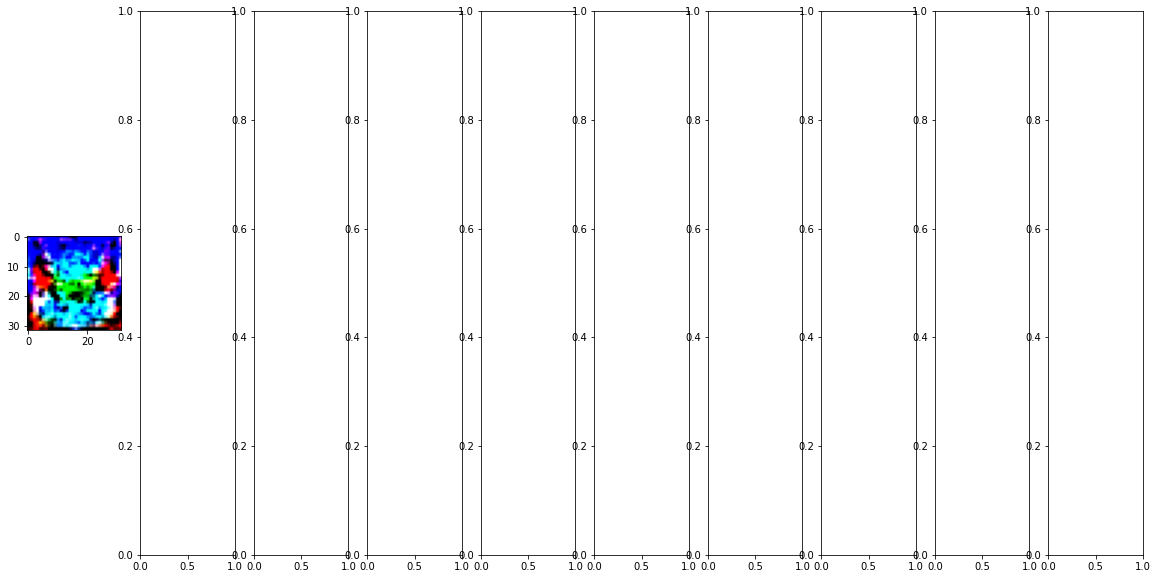

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [61]:
# Printing accuracies and displaying w as images
plt.plot(loss_history)
fig,ax=plt.subplots(1,10)
fig.set_size_inches(20,10)

for i in range(10):
    img=w1[:,i].reshape(32,32,3)
    ax[i].imshow(img*1000)
    plt.show()

In [ ]:
y_pred1 = x_train.dot(w1)+b1
train_acc = 1.0-1/(9*Ntr)*(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred1,axis=1))).sum()
print('train_accuracy = ',train_acc)

y_pred2=x_test.dot(w1)+b1
test_acc=1.0-1/(9*Nte)*(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred2,axis=1))).sum()
print('test_accuracy = ',test_acc)

In [ ]:
model = keras.models.Sequential([keras.layers.Dense(10, input_shape=[3,32, 32], activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')])
model.add(keras.layers.Dense(10, activation="softmax"))
weights, biases = model.layers[1].get_weights()
weights.shape
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model_history = model.fit(x_train, y_train, epochs=30)